In [1]:
# Import libraries
import h5py
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Download Datasets

In [2]:
print('Beginning file download with urllib2...')
# Files from https://github.com/ridhimagarg/Cat-vs-Non-cat-Deep-learning-implementation
training_file_name = "training-set.h5"
training_url = 'https://raw.githubusercontent.com/ridhimagarg/Cat-vs-Non-cat-Deep-learning-implementation/master/datasets/train_catvnoncat.h5'
urllib.request.urlretrieve(training_url, training_file_name)
test_file_name = 'test-set.h5'
test_url = 'https://raw.githubusercontent.com/ridhimagarg/Cat-vs-Non-cat-Deep-learning-implementation/master/datasets/test_catvnoncat.h5'
urllib.request.urlretrieve(test_url, test_file_name)

Beginning file download with urllib2...


('test-set.h5', <http.client.HTTPMessage at 0x7f8f3d38b208>)

Load Datasets

In [3]:
with h5py.File(training_file_name, "r") as train:
    # List all groups
    print("train Keys: %s" % train.keys())
    # Get the data
    raw_train_x = train.get('train_set_x')[()]
    raw_train_y = train.get('train_set_y')[()]

with h5py.File(test_file_name, "r") as test:
    # List all groups
    print("test Keys: %s" % test.keys())
    # Get the data
    raw_test_x = test.get('test_set_x')[()]
    raw_test_y = test.get('test_set_y')[()]


train Keys: <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
test Keys: <KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>


[0 0 1 0 0 0 0 1 0 0]
[0 0 1 0 0 0 0 1 0 0]
{'x': (209, 64, 64, 3), 'y': 209}
{'x': (50, 64, 64, 3), 'y': 50}
Cat


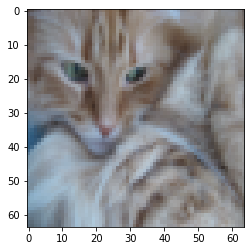

In [10]:
orig_train_x = np.array(raw_train_x)
orig_train_y = np.array(raw_train_y)
orig_test_x = np.array(raw_test_x)
orig_test_y = np.array(raw_test_y)

inverter = lambda t: 1 if t == 0 else 0
vfunc = np.vectorize(inverter)


train_x = orig_train_x #orig_train_x.reshape(orig_train_x.shape[0], -1)
train_y = orig_train_y
test_x = orig_test_x #orig_test_x.reshape(orig_test_x.shape[0], -1)
test_y = orig_test_y
print(orig_train_y[:10])
print(train_y[:10])
print({ 'x': train_x.shape, 'y': len(train_y) })
print({ 'x': test_x.shape, 'y': len(test_y) })
test_index = 2
plt.imshow(train_x[test_index])
print('Cat' if train_y[test_index] == 1 else 'Non-cat')

In [22]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(64, 64, 3)),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.1),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation='sigmoid'),
    ]
)

# Coursera Version
# model = keras.Sequential(
#     [
#         layers.Flatten(input_shape=(64, 64, 3)),
#         layers.Dense(20, activation="relu"),
#         layers.Dense(7, activation="relu"),
#         layers.Dense(5, activation="relu"),
#         layers.Dense(1, activation="sigmoid"),
#     ]
# )
# Call model on a test input
model.compile(optimizer='adam',loss= tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
model.build(input_shape=train_x.shape)
model.summary()
history = model.fit(x=train_x, y = train_y, epochs = 80)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               6291968   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 6,365,953
Trainable params: 6,365,953
Non-trainable params: 0
____________________________________________

dict_keys(['loss', 'accuracy'])


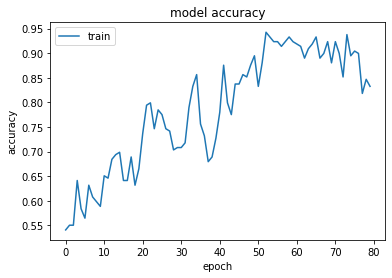

In [23]:
# Show Loss
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
model.evaluate(test_x, test_y,  verbose=2)

2/2 - 0s - loss: 6.2677 - accuracy: 0.7600


[6.267660140991211, 0.7599999904632568]

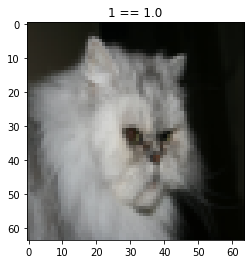

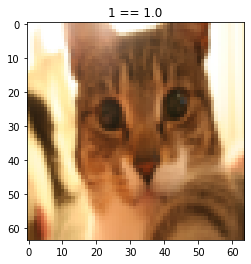

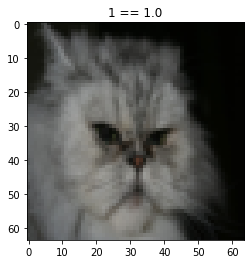

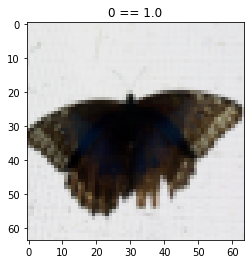

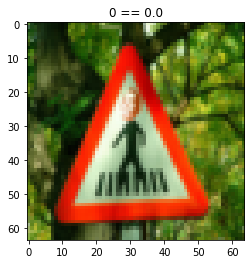

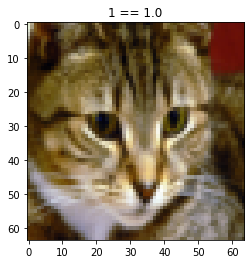

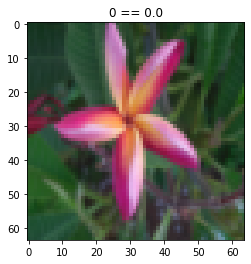

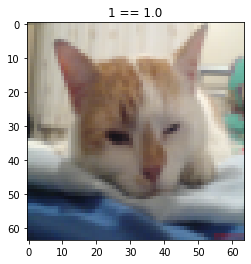

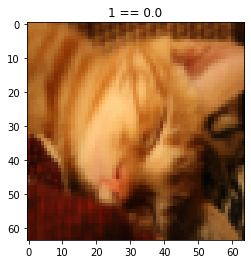

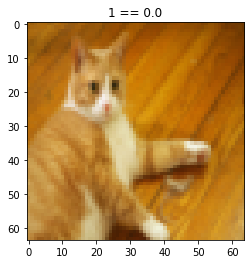

In [25]:
pred_index = 10
predicted = model.predict(test_x[pred_index:pred_index+10]).round().T[0]
expected = test_y[pred_index:pred_index+10]
for i in range(pred_index):
  plt.figure()
  plt.title(str(expected[i]) + ' == ' + str(predicted[i]))
  plt.imshow(test_x[pred_index+i], )